# 기본 옵션 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image

import numpy as np
# 기본 옵션들
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import matplotlib.font_manager as fm
mpl.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max.colwidth',100)
pd.options.display.max_columns = 10

set_matplotlib_formats('retina')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 데이터셋 적재 
- (동영상 제목 전처리 포함한거 가져온 데이터셋 활용 )

In [2]:
df = pd.read_csv('@preprocessed_youtube_data_final.csv',encoding='utf-8-sig')
df.shape
df.info()
df.columns
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

(4568, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568 entries, 0 to 4567
Data columns (total 12 columns):
Unnamed: 0           4568 non-null int64
youtuber             4568 non-null object
subscribers          4568 non-null int64
name                 4568 non-null object
upload_date          4568 non-null object
hits                 4568 non-null int64
likes_num            4568 non-null int64
dislikes_num         4568 non-null int64
days_after_upload    4568 non-null int64
youtuber_id          4568 non-null int64
clean_name           4568 non-null object
clean_name_noun      4568 non-null object
dtypes: int64(7), object(5)
memory usage: 428.3+ KB


Index(['Unnamed: 0', 'youtuber', 'subscribers', 'name', 'upload_date', 'hits',
       'likes_num', 'dislikes_num', 'days_after_upload', 'youtuber_id',
       'clean_name', 'clean_name_noun'],
      dtype='object')

,youtuber,subscribers,name,upload_date,hits,...,dislikes_num,days_after_upload,youtuber_id,clean_name,clean_name_noun
0,취미로 요리하는 남자 Yonam,556000000,요리사들이 한 자리에 모이면 벌어지는 일 2 (오리다리콩피),-9 days +07:27:27.585545000,245137,...,67,9,0,요리사 들 하다 자리 모이 면 벌어지다 일 오리 다리 콩피,"['요리사', '자리', '모이', '면', '일', '오리', '다리', '콩피']"
1,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자의 간단한 집들이음식,-30 days +07:27:27.585545000,630196,...,124,30,0,요리 하다 남자 간단하다 집들이 음식,"['요리', '남자', '집들이', '음식']"
2,취미로 요리하는 남자 Yonam,556000000,(종료)제가 여러분께 요리를 해드립니다.,-43 days +07:27:27.585545000,160997,...,21,43,0,종료 제 여러분 께 요리 해드리다,"['종료', '제', '여러분', '요리']"
3,취미로 요리하는 남자 Yonam,556000000,sub)요리사들이 한 자리에 모이면 벌어지는 일.,-59 days +07:27:27.585545000,1962881,...,384,59,0,요리사 들 하다 자리 모이 면 벌어지다 일,"['요리사', '자리', '모이', '면', '일']"
4,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자들의 흔한 파티음식.,-71 days +07:27:27.585545000,720225,...,144,71,0,요리 하다 남자 들 흔하다 파티 음식,"['요리', '남자', '파티', '음식']"


- clean_name_noun 데이터가 가져오려고 했던 모양이랑 달라서 한번 더 정제

In [3]:
import konlpy
from konlpy.tag import Okt
import re
okt=Okt()

In [4]:
df['clean_name_noun'] = df['clean_name'].apply(lambda x : okt.nouns(x))
df[['name','clean_name','clean_name_noun']].sample(15,random_state=1234)

,name,clean_name,clean_name_noun
1198,🔥 넌 커리? 난 카레~! 카레랑 밥이랑 ★ 카레라이스 레시피 ★ 🔥 [만개의레시피],넌 커리 난 카레 카레 밥 이랑 카레라이스,"[넌, 커리, 난, 카레, 카레, 밥, 카레라이스]"
2306,펑리수 달콤한 파인애플쨈이 쏘옥! [만개의레시피],펑 리수 달콤하다 파인애플 째다 쏘다 옥,"[펑, 리수, 파인애플, 옥]"
2963,애호박조개전 ☆ 크으~ 땡긴다 땡겨! [만개의레시피],애호박 조 개전 크으 땡기다 땡기다,"[애호박, 조, 개전]"
998,🔥 홍합이 입벌리는 최고의 순간 홍합탕 레시피 🔥 [만개의레시피],홍합 입 벌리다 최고 순간 홍합 탕,"[홍합, 입, 최고, 순간, 홍합, 탕]"
2375,미니크루아상 샌드위치 귀엽고맛있어 ... ♡ [만개의레시피],미니 크루아상 샌드위치 귀엽다 맛있다,"[미니, 크루아상, 샌드위치]"
1637,🔥 집에서 먹는 중국요리 레시피 ☆ 오늘의식단 🔥 [만개의레시피],집 먹다 중국요리 오늘 식단,"[집, 중국요리, 오늘, 식단]"
3034,쪽파손질법 ♡ 야무지게 활용하자! [만개의노하우],쪽파 손질 법 야무지다 활용 하다 노하우,"[쪽파, 손질, 법, 활용, 노하우]"
142,당신의 요리실력을 망치는 인터넷 레시피의 문제점,당신 요리실 력 망치다 인터넷 문제점,"[당신, 요리실, 망치, 인터넷, 문제점]"
3060,돌체라떼 ♥ 연유에 우유까지 [만개의레시피],돌체 라떼 연유 우유 까지,"[돌체, 라떼, 연유, 우유]"
149,떡볶이를 천상계로 끌어올리는 셰프의 킥 두가지,떡볶이 천상계 끌다 올리다 셰프 킥 두 가지,"[떡볶이, 천상계, 리다, 셰프, 킥, 두, 가지]"


In [5]:
df = df[['youtuber_id','subscribers','days_after_upload','clean_name_noun','hits']] # likes / dislikes 활용 안할거같아서 우선 포함 X
df.head()

,youtuber_id,subscribers,days_after_upload,clean_name_noun,hits
0,0,556000000,9,"[요리사, 자리, 모이, 면, 일, 오리, 다리, 콩피]",245137
1,0,556000000,30,"[요리, 남자, 집들이, 음식]",630196
2,0,556000000,43,"[종료, 제, 여러분, 요리]",160997
3,0,556000000,59,"[요리사, 자리, 모이, 면, 일]",1962881
4,0,556000000,71,"[요리, 남자, 파티, 음식]",720225


# EDA (동영상 제목 TF-IDF포함)

Text(0.5, 1.0, 'Count of youtuber_id')

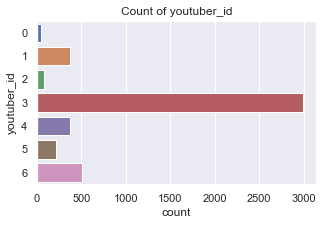

In [6]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(y='youtuber_id',data=df)
plt.title('Count of youtuber_id')

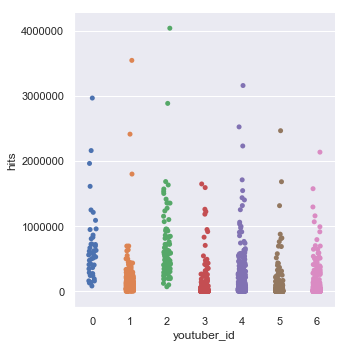

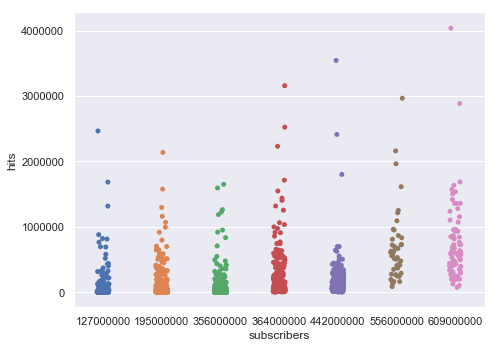

In [7]:
sns.set(rc={'figure.figsize':(5,3)})
sns.catplot(x='youtuber_id',y='hits',data=df) # 영상이 많다고, 조회수가 높은게 아니다 -> 키워드가 중요한거같다
sns.catplot(x='subscribers',y='hits',data=df,aspect=11.7/8.27) # 구독자수와 양의 상관관계가 있지만, 대부분의 영상은 1000000에 몰려있는 것을 볼 수 있다.

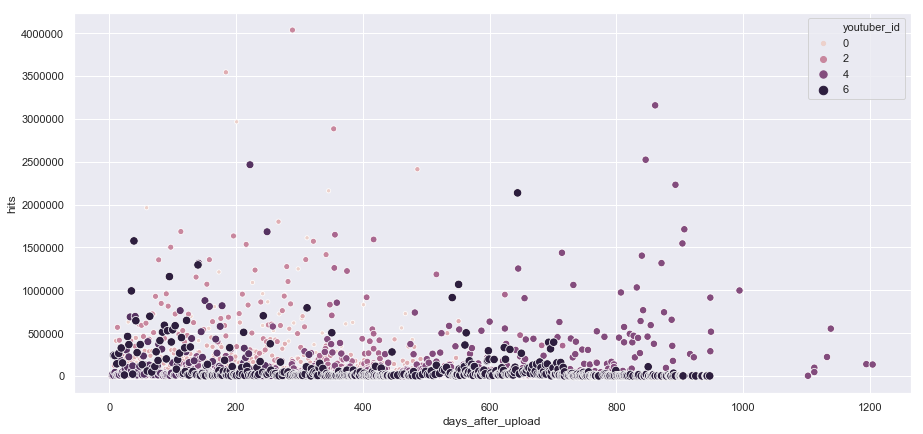

In [8]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x='days_after_upload', y='hits',hue='youtuber_id', size='youtuber_id', data=df)

## 동영상 제목 키워드로 살펴보기
- TF-IDF 활용할 예정

In [9]:
df_name_noun = df[['clean_name_noun']]

pre_total_word_list = []
for i in df_name_noun['clean_name_noun']:
    pre_total_word_list.append(' '.join(i))
    
df_name_noun['pre_total_word_list'] = pre_total_word_list

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


- 어떤걸 써야하나 고민..

In [10]:
total_word_list= ' '.join(pre_total_word_list[0:]).split()
len(total_word_list)

# 중복되는 단어 제거 = 4131개
total_word_list1 = list(set(total_word_list))
len(total_word_list1)

# 2번 이상나온 단어 제거 = 2235개 
freq = pd.Series(total_word_list).value_counts()
total_word_list2 = freq[freq>1].index
len(total_word_list2)

# 3번 이상 나온 단어 제거 = 1594개
freq = pd.Series(total_word_list).value_counts()
total_word_list3 = freq[freq>2].index
len(total_word_list3)

27119

4131

2235

1594

In [11]:
df_name_noun['clean_name_most_freq2'] = df_name_noun['pre_total_word_list'].apply(lambda x: ' '.join([word for word in x.split() if word in (total_word_list2)]))
df_name_noun['clean_name_most_freq3'] = df_name_noun['pre_total_word_list'].apply(lambda x: ' '.join([word for word in x.split() if word in (total_word_list3)]))

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df_name_noun.head()

,clean_name_noun,pre_total_word_list,clean_name_most_freq2,clean_name_most_freq3
0,"[요리사, 자리, 모이, 면, 일, 오리, 다리, 콩피]",요리사 자리 모이 면 일 오리 다리 콩피,요리사 자리 모이 면 일 오리 다리,요리사 자리 모이 면 일 오리
1,"[요리, 남자, 집들이, 음식]",요리 남자 집들이 음식,요리 남자 집들이 음식,요리 남자 집들이 음식
2,"[종료, 제, 여러분, 요리]",종료 제 여러분 요리,종료 제 여러분 요리,제 요리
3,"[요리사, 자리, 모이, 면, 일]",요리사 자리 모이 면 일,요리사 자리 모이 면 일,요리사 자리 모이 면 일
4,"[요리, 남자, 파티, 음식]",요리 남자 파티 음식,요리 남자 파티 음식,요리 남자 파티 음식


- 각 영상에 언급된 단어의 빈도수를 수치화 시켜 -> hits 와의 연관성 비교

In [29]:
df['clean_name_most_freq2'] = df_name_noun['pre_total_word_list'].apply(lambda x: ' '.join([word for word in x.split() if word in (total_word_list2)]))
df.head(15)

,youtuber_id,subscribers,days_after_upload,clean_name_noun,hits,clean_name_most_freq2,name*weight
0,0,556000000,9,"[요리사, 자리, 모이, 면, 일, 오리, 다리, 콩피]",245137,요리사 자리 모이 면 일 오리 다리,1.430516e-09
1,0,556000000,30,"[요리, 남자, 집들이, 음식]",630196,요리 남자 집들이 음식,2.531077e-02
2,0,556000000,43,"[종료, 제, 여러분, 요리]",160997,종료 제 여러분 요리,2.151661e-02
3,0,556000000,59,"[요리사, 자리, 모이, 면, 일]",1962881,요리사 자리 모이 면 일,9.316933e-10
4,0,556000000,71,"[요리, 남자, 파티, 음식]",720225,요리 남자 파티 음식,2.879285e-02
5,0,556000000,120,"[요리, 남자, 글램핑, 스테이크, 비프, 립, 돌, 문어, 또, 라면]",477349,요리 남자 스테이크 비프 립 돌 문어 또 라면,3.986324e-02
6,0,556000000,129,"[취미, 요리, 남자, 무려, 다섯, 명, 초밥, 도전]",696346,취미 요리 남자 무려 명 초밥 도전,3.986324e-02
7,0,556000000,141,"[바닷가, 브런치, 개뿔]",411963,브런치,7.276233e-03
8,0,556000000,157,"[요리, 남자, 캠핑카, 일]",556207,요리 남자 캠핑카 일,1.834663e-02
9,0,556000000,166,"[요리, 남자, 캠핑카, 랍스터]",808580,요리 남자 캠핑카 랍스터,2.214079e-02


- 우선 most_freq 2를 사용해보기로 결정

In [14]:
df_most_freq2 = df[['youtuber_id','clean_name_most_freq2', 'subscribers', 'days_after_upload', 'hits']]
df_most_freq2.head()

,youtuber_id,clean_name_most_freq2,subscribers,days_after_upload,hits
0,0,요리사 자리 모이 면 일 오리 다리,556000000,9,245137
1,0,요리 남자 집들이 음식,556000000,30,630196
2,0,종료 제 여러분 요리,556000000,43,160997
3,0,요리사 자리 모이 면 일,556000000,59,1962881
4,0,요리 남자 파티 음식,556000000,71,720225


### TF-IDF
- 1) 파이썬으로 직접 구현
- 2) TF-IDF 패키지 활용

### 1) 파이썬으로 직접 구현

In [16]:
from math import log

In [17]:
def tf(t, d):
    return d.count(t)

def idf(t,docs):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t,d)

- TF

In [18]:
N = len(df_most_freq2)
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = df_most_freq2['clean_name_most_freq2'][i]
    for j in range(len(total_word_list2)):
        t = total_word_list2[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = total_word_list2)
tf_

,법,요리,만들기,가지,볶음,...,로그,피오,설렁탕,습격,인기가요
0,0,1,0,0,0,...,0,0,0,0,0
1,0,1,0,0,0,...,0,0,0,0,0
2,0,1,0,0,0,...,0,0,0,0,0
3,0,1,0,0,0,...,0,0,0,0,0
4,0,1,0,0,0,...,0,0,0,0,0
5,0,1,0,0,0,...,0,0,0,0,0
6,0,1,0,0,0,...,0,0,0,0,0
7,0,0,0,0,0,...,0,0,0,0,0
8,0,1,0,0,0,...,0,0,0,0,0
9,0,1,0,0,0,...,0,0,0,0,0


- IDF

In [19]:
result = []
for j in range(len(total_word_list2)):
    d = df_most_freq2['clean_name_most_freq2']
    t = total_word_list2[j]
    result.append(idf(t,d))

idf_ = pd.DataFrame(result, index = total_word_list2, columns = ["IDF"])
idf_

,IDF
법,1.735988
요리,2.218241
만들기,2.377097
가지,2.612700
볶음,2.683828
밥,2.308734
맛,2.489295
노하우,3.201084
무치,3.450097
쉬,3.416195


- TF-IDF

In [20]:
N = len(df_most_freq2)
result = []
for i in range(N):
    result.append([])
    d = df_most_freq2['clean_name_most_freq2'][i]
    for j in range(len(total_word_list2)):
        t = total_word_list2[j]       
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = total_word_list2)
tfidf_

,법,요리,만들기,가지,볶음,...,로그,피오,설렁탕,습격,인기가요
0,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
1,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
2,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
3,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
4,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
5,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
6,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
8,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
9,0.000000,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0


In [21]:
tfidf_.shape
tfidf_.head()
tfidf_.tail()

(4568, 2235)

,법,요리,만들기,가지,볶음,...,로그,피오,설렁탕,습격,인기가요
0,0.0,8.426831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,8.426831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,8.426831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,8.426831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.0,8.426831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


,법,요리,만들기,가지,볶음,...,로그,피오,설렁탕,습격,인기가요
4563,7.733684,0.000000,0.000000,8.426831,0.000000,...,0.0,0.0,0.0,0.0,0.0
4564,7.733684,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
4565,7.733684,8.426831,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0
4566,0.000000,0.000000,16.853662,0.000000,8.426831,...,0.0,0.0,0.0,0.0,0.0
4567,0.000000,0.000000,16.853662,8.426831,8.426831,...,0.0,0.0,0.0,0.0,0.0


In [71]:
df.sample(15,random_state=3)

,youtuber_id,subscribers,days_after_upload,clean_name_noun,hits,clean_name_most_freq2,name*weight
4539,6,195000000,884,"[카레, 요리, 얼, 칼칼, 고구마, 카레, 만들기]",86,카레 요리 얼 칼칼 고구마 카레 만들기,0.056178
2195,3,356000000,401,"[그냥, 콘치, 소시지, 콘치]",57491,그냥 콘치 소시지 콘치,0.038821
4353,6,195000000,597,"[쉬, 느타리버섯, 볶음, 법]",182960,쉬 느타리버섯 볶음 법,0.029105
1281,3,356000000,226,"[흑임자, 소스, 연, 두부, 만남, 연, 두부, 샐러드]",1971,소스 연 두부 만남 연 두부 샐러드,0.042615
4067,6,195000000,15,"[계란, 가지, 요리]",262820,계란 가지 요리,0.014552
4358,6,195000000,603,"[건, 새우, 마늘, 볶음, 만들기, 마늘, 향, 솔솔, 짭쪼롬하, 게]",10432,건 새우 마늘 볶음 만들기 마늘 향 솔솔 짭쪼롬하 게,0.057845
4418,6,195000000,700,"[법, 쉬]",93110,법 쉬,0.006964
1406,3,356000000,251,"[영양, 만점, 생선, 조림, 부터, 국물, 반찬, 오늘, 식단]",3233,영양 만점 생선 조림 부터 국물 반찬 오늘 식단,0.072450
232,1,442000000,291,"[냉동, 만두, 계, 그, 제품, 리뷰]",113564,냉동 만두 계 그 제품 리뷰,0.036069
3990,5,127000000,252,"[지금, 부산, 가장, 핫, 뉴웨이브, 컨셉, 분식, 맛집]",2311,지금 부산 가장 핫 분식 맛집,0.043345


### 2) TF-IDF 패키지 활용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfv = TfidfVectorizer().fit(df_most_freq2['clean_name_most_freq2'])
tfidf_df = tfidfv.transform(df_most_freq2['clean_name_most_freq2']).toarray()
tfidf_voca = tfidfv.vocabulary_
tfidf_df
# tfidf_voca

# 동영상 제목으로부터 hits를 예측할 수는 최적화 weights 찾기

In [23]:
import scipy.optimize as sco

In [24]:
def __predict_hits__(weights): 
    weights = np.array(weights)
    hits = np.array(df['hits'])
    subscribers = np.array(df['subscribers'])
    predict_hits = tfidf_ @ weights + subscribers
    result = (hits-(predict_hits.values))
    return result

In [25]:
# Optimization 제약식
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(len(tfidf_.columns))) 

def min_hits_differ(weights):
    return -(__predict_hits__(weights)[0])

opt = sco.minimize(min_hits_differ, len(tfidf_.columns)*[1./len(tfidf_.columns),], method='SLSQP', bounds=bnds, constraints=cons)
opt['x'] # x = 최적화 해 = weights임 

array([4.50247641e-04, 4.98187559e-12, 4.50247636e-04, ...,
       4.50247636e-04, 4.50247636e-04, 4.50247636e-04])

In [26]:
word_weight = opt['x']
word_weight

array([4.50247641e-04, 4.98187559e-12, 4.50247636e-04, ...,
       4.50247636e-04, 4.50247636e-04, 4.50247636e-04])

In [27]:
df['name*weight'] = tfidf_ @ word_weight

In [28]:
df['youtuber_id'] = df['youtuber_id'].astype(str)

# Modeling
 ① 다중회귀분석  
② Gradient Boosting regressor  
③ Lasso regressor   
④ XGBoost  
⑤ RandomForest  

In [30]:
from datetime import datetime
import os
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib notebook
%matplotlib inline

# 회귀분석에 필요한 패키지
import statsmodels.api as sm

## 다중회귀분석
R-squared:	0.315  
Adj. R-squared:	0.310

- 데이터셋 나누기

In [31]:
df_final = df.drop(['clean_name_noun','clean_name_most_freq2'],axis=1)
# df_final['name*weight'] = df_final['name*weight'].apply(lambda x: x >= np.finfo(np.float32).max)
# np.where(df_final['name*weight'].values >= np.finfo(np.float32).max)
# df_final['name*weight'].replace([np.inf, -np.inf], np.nan, inplace=True) 

In [32]:
df_with_dummies = pd.get_dummies(df_final) 
df_with_dummies.head()

,subscribers,days_after_upload,hits,name*weight,youtuber_id_0,...,youtuber_id_2,youtuber_id_3,youtuber_id_4,youtuber_id_5,youtuber_id_6
0,556000000,9,245137,1.430516e-09,1,...,0,0,0,0,0
1,556000000,30,630196,2.531077e-02,1,...,0,0,0,0,0
2,556000000,43,160997,2.151661e-02,1,...,0,0,0,0,0
3,556000000,59,1962881,9.316933e-10,1,...,0,0,0,0,0
4,556000000,71,720225,2.879285e-02,1,...,0,0,0,0,0


In [33]:
X = df_with_dummies.drop(['hits'],axis=1)
y = df_with_dummies['hits']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\LG\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
X.columns

Index(['const', 'subscribers', 'days_after_upload', 'youtuber_id_0',
       'youtuber_id_1', 'youtuber_id_2', 'youtuber_id_3', 'youtuber_id_4',
       'youtuber_id_5', 'youtuber_id_6'],
      dtype='object')

In [35]:
X_train.head()
y_train.head()

,const,subscribers,days_after_upload,youtuber_id_0,youtuber_id_1,youtuber_id_2,youtuber_id_3,youtuber_id_4,youtuber_id_5,youtuber_id_6
783,1.0,356000000,97,0,0,0,1,0,0,0
1572,1.0,356000000,281,0,0,0,1,0,0,0
3163,1.0,356000000,632,0,0,0,1,0,0,0
3159,1.0,356000000,631,0,0,0,1,0,0,0
1268,1.0,356000000,223,0,0,0,1,0,0,0


783      3550
1572     1702
3163    62101
3159      602
1268     1475
Name: hits, dtype: int64

In [36]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hits   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     220.5
Date:                Sun, 05 Apr 2020   Prob (F-statistic):          6.91e-274
Time:                        05:09:54   Log-Likelihood:                -49469.
No. Observations:                3654   AIC:                         9.895e+04
Df Residuals:                    3646   BIC:                         9.900e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -1.3e+05   8314.769    -15.630      0.000   -1.46e+05   -1.14e+05
subscribers           0.0011   3.26e-05     33.830      0.000       0.001       0.001
days_after_upload    22.6051     14.825      1.525      0.127      -6.461      51.671
youtuber_id_0      2.249e+05   2.36e+04      9.533      0.000    1.79e+05    2.71e+05
youtuber_id_1     -2.142e+05   1.24e+04    -17.233      0.000   -2.39e+05    -1.9e+05
youtuber_id_2       1.51e+05   1.83e+04      8.259      0.000    1.15e+05    1.87e+05
youtuber_id_3     -2.587e+05   7140.641    -36.225      0.000   -2.73e+05   -2.45e+05
youtuber_id_4     -1.051e+05   1.14e+04     -9.209      0.000   -1.27e+05   -8.27e+04
youtuber_id_5      8.878e+04   1.07e+04      8.295      0.000    6.78e+04     1.1e+05
youtuber_id_6     -1.667e+04   8930.155     -1.866      0.062   -3.42e+04     840.918
==============================================================================
Omnibus:                     5098.013   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1539869.267
Skew:                           8.061   Prob(JB):                         0.00
Kurtosis:                     102.268   Cond. No.                     2.22e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- test셋 결과 

In [37]:
model = sm.OLS(y_test,X_test).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hits   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     59.48
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.03e-70
Time:                        05:09:55   Log-Likelihood:                -12450.
No. Observations:                 914   AIC:                         2.492e+04
Df Residuals:                     906   BIC:                         2.495e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.402e+05   1.81e+04     -7.734      0.000   -1.76e+05   -1.05e+05
subscribers           0.0011   6.58e-05     16.630      0.000       0.001       0.001
days_after_upload    34.2093     34.363      0.996      0.320     -33.230     101.649
youtuber_id_0      1.371e+05   4.98e+04      2.752      0.006    3.93e+04    2.35e+05
youtuber_id_1     -1.957e+05   2.52e+04     -7.770      0.000   -2.45e+05   -1.46e+05
youtuber_id_2      2.067e+05   3.51e+04      5.883      0.000    1.38e+05    2.76e+05
youtuber_id_3      -2.51e+05   1.49e+04    -16.873      0.000    -2.8e+05   -2.22e+05
youtuber_id_4     -8.314e+04   2.61e+04     -3.187      0.001   -1.34e+05   -3.19e+04
youtuber_id_5      7.258e+04   2.46e+04      2.955      0.003    2.44e+04    1.21e+05
youtuber_id_6     -2.676e+04   2.06e+04     -1.296      0.195   -6.73e+04    1.38e+04
==============================================================================
Omnibus:                     1358.255   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           470102.634
Skew:                           8.457   Prob(JB):                         0.00
Kurtosis:                     112.809   Cond. No.                     6.39e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Gradient Boosting regressor
Score on training set:0.562  
Score on test set:0.358

 

In [38]:
# export_graphviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

- 데이터셋 나누기

In [39]:
df_get_dummies = pd.get_dummies(df_final)
X = df_get_dummies .drop(['hits'],axis=1)
y = df_get_dummies ['hits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train data X size : {}'.format(X_train.shape))
print('train data Y size : {}'.format(y_train.shape))
print('test data X size : {}'.format(X_test.shape))
print('test data X size : {}'.format(y_test.shape))

train data X size : (3654, 10)
train data Y size : (3654,)
test data X size : (914, 10)
test data X size : (914,)


- 기본 옵션으로 모델 생성해보기

In [40]:
gb_uncustomized=GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(X_train,y_train)
print('Score on training set:{:.3f}'.format(gb_uncustomized.score(X_train,y_train)))
print('Score on test set:{:.3f}'.format(gb_uncustomized.score(X_test,y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Score on training set:0.595
Score on test set:0.333


### try

#### n-estimator

In [41]:
# train 및 test 설명력 결과 저장
train_score=[]; test_score=[]

para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=v_n_estimators)
    gb.fit(X_train,y_train)
    train_score.append(gb.score(X_train,y_train))
    test_score.append(gb.score(X_test,y_test))
    
df_score_n=pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=30, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=60, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=70, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=80, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

,n_estimators,TrainScore,TestScore
0,10,0.343,0.288
1,20,0.407,0.330
2,30,0.445,0.341
3,40,0.477,0.347
4,50,0.502,0.343
5,60,0.528,0.345
6,70,0.544,0.343
7,80,0.561,0.342
8,90,0.572,0.342
9,100,0.595,0.333


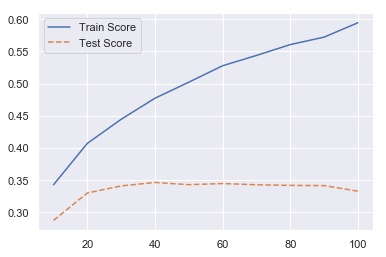

In [42]:
# 모델 설명력 그래프 확인
df_score_n.round(3)
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.legend()

- 1) 40
- 2) 50
- 3) 40

#### min_samples_leaf

In [43]:
train_score=[]; test_score=[]

para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=1234, n_estimators=40, min_samples_leaf=v_min_samples_leaf)
    gb.fit(X_train,y_train)
    train_score.append(gb.score(X_train,y_train))
    test_score.append(gb.score(X_test,y_test))
    
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=7,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=11,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=12,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=13,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=14,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=15,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=16,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=17,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=18,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=19,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.477,0.347
1,2,0.468,0.333
2,3,0.473,0.325
3,4,0.464,0.326
4,5,0.455,0.328
5,6,0.447,0.327
6,7,0.449,0.333
7,8,0.444,0.342
8,9,0.441,0.339
9,10,0.441,0.342


- 1) 8
- 2) 10
- 3) 8

#### min_samples_split

In [45]:
# train 및 test 설명력 결과 저장
train_score=[]; test_score=[]

para_split=[n_split*2 for n_split in range(5,30)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=40,min_samples_leaf=8, min_samples_split=v_min_samples_split)
    gb.fit(X_train,y_train)
    train_score.append(gb.score(X_train,y_train))
    test_score.append(gb.score(X_test,y_test))
    
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSmplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=12, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=14, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=16, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=18, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=22, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=24, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=26, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=30, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=32, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=34, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=36, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=38, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=40, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=42, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=44, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=46, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=48, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=52, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=54, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=56, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=58, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
df_score_split.round(3)

,MinSamplesSmplit,TrainScore,TestScore
0,10,0.444,0.342
1,12,0.444,0.342
2,14,0.444,0.342
3,16,0.444,0.342
4,18,0.444,0.342
5,20,0.441,0.339
6,22,0.442,0.340
7,24,0.443,0.339
8,26,0.443,0.339
9,28,0.437,0.343


- 1) 20
- 2) 26
- 3) 28

#### max_depth

In [47]:
# train 및 test 설명력 결과 저장
train_score=[]; test_score=[]

para_depth=[depth for depth in range(3,10)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=40,min_samples_leaf=8, min_samples_split=28,max_depth=v_max_depth)
    gb.fit(X_train,y_train)
    train_score.append(gb.score(X_train,y_train))
    test_score.append(gb.score(X_test,y_test))
    
df_score_depth=pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=9, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

,Depth,TrainScore,TestScore
0,3,0.437,0.343
1,4,0.489,0.350
2,5,0.520,0.353
3,6,0.549,0.348
4,7,0.565,0.343
5,8,0.588,0.341
6,9,0.607,0.338


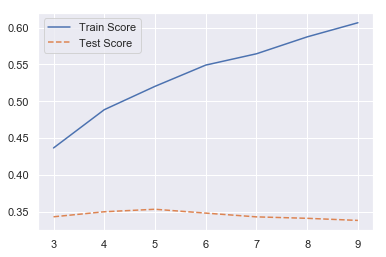

In [48]:
# 모델 설명력 확인
df_score_depth.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.legend()

- 1) 4
- 2) 6
- 3) 5

#### learning_rate

In [49]:
# train 및 test 설명력 결과 저장
train_score=[]; test_score=[]

para_lr=[lr*0.01 for lr in range(5,20)]

for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=40,min_samples_leaf=8, min_samples_split=28,max_depth=5,learning_rate=v_learning_rate)
    gb.fit(X_train,y_train)
    train_score.append(gb.score(X_train,y_train))
    test_score.append(gb.score(X_test,y_test))
    
df_score_lr=pd.DataFrame()
df_score_lr['LearningRate']=para_lr
df_score_lr['TrainScore']=train_score
df_score_lr['TestScore']=test_score

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.06, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.07, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.08, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.09, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.11, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.13, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.14, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.16, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.17, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.18, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.19, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

,LearningRate,TrainScore,TestScore
0,0.05,0.467,0.349
1,0.06,0.479,0.353
2,0.07,0.493,0.352
3,0.08,0.504,0.353
4,0.09,0.516,0.346
5,0.10,0.520,0.353
6,0.11,0.525,0.346
7,0.12,0.528,0.351
8,0.13,0.532,0.350
9,0.14,0.538,0.344


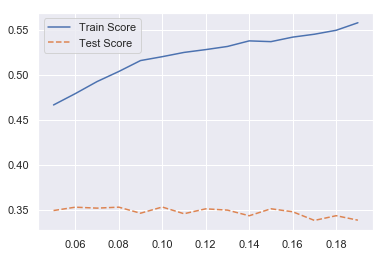

In [50]:
df_score_lr.round(3)
# 모델 설명력 그래프 확인
plt.plot(para_lr,train_score,linestyle='-',label='Train Score')
plt.plot(para_lr,test_score,linestyle='--',label='Test Score')
plt.legend()

- 1) 0.07
- 2) 0.1

#### GridSearchCV

In [51]:
param_grid = [ {'n_estimators' : [35,40,45,50],'min_samples_leaf' : [7,8,9,10],'min_samples_split' : [22,23,24,25], 
                'max_depth': [3,4,5,6],'learning_rate': [0.1] } ] 

grid_search = GridSearchCV(gb,param_grid,cv=3)
grid_search.fit(X_train,y_train)
grid_search.best_params_ # 사용자 지정 중 최적 파라미터
grid_search.best_estimator_ # 전체 중 최적 파라미터

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.19, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samp...=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [35, 40, 45, 50], 'min_samples_leaf': [7, 8, 9, 10], 'min_samples_split': [22, 23, 24, 25], 'max_depth': [3, 4, 5, 6], 'learning_rate': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 23,
 'n_estimators': 50}

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=23, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

### 최종 모델 생성

In [52]:
# 내가 찾은 파라미터
gb_final=GradientBoostingRegressor(n_estimators=40,min_samples_leaf=8, min_samples_split=28,max_depth=5,learning_rate=0.1, random_state=1234)
gb_final.fit(X_train,y_train)

# 그리드 서치 파라미터
gb_final_GS=GradientBoostingRegressor(n_estimators=50,min_samples_leaf=9,min_samples_split=23,max_depth=4,learning_rate=0.1,random_state=1234)
gb_final_GS.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=28, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=23, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
print('Score on training set:{:.3f}'.format(gb_final.score(X_train,y_train)))
print('* Score on test set:{:.3f}'.format(gb_final.score(X_test,y_test)))

print('Score on training set:{:.3f}'.format(gb_final_GS.score(X_train,y_train)))
print('* Score on test set:{:.3f}'.format(gb_final_GS.score(X_test,y_test)))

Score on training set:0.520
* Score on test set:0.353
Score on training set:0.510
* Score on test set:0.349


In [54]:
gb_importance=pd.DataFrame()
gb_importance['Feature']= X_train.columns
gb_importance['Importance']=gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
gb_importance.sort_values('Importance',ascending=False,inplace=True)
gb_importance.round(3)

,Feature,Importance
0,subscribers,0.501
1,days_after_upload,0.246
2,name*weight,0.088
6,youtuber_id_3,0.077
7,youtuber_id_4,0.063
9,youtuber_id_6,0.018
3,youtuber_id_0,0.004
5,youtuber_id_2,0.002
4,youtuber_id_1,0.001
8,youtuber_id_5,0.001


## Lasso Regression X
R^2 score on training set 0.301  
R^2 score on test set 0.309

In [55]:
from sklearn.linear_model import Lasso

In [138]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
print('Lasso Regression: R^2 score on training set', lasso_reg.score(X_train, y_train))
print('Lasso Regression: R^2 score on test set', lasso_reg.score(X_test, y_test))

Lasso Regression: R^2 score on training set 0.3012914468201533
Lasso Regression: R^2 score on test set 0.30994875938600963


In [58]:
alpha = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [59]:
# enumerate through lambdas with index and i
for ind, i in enumerate(alpha):    
    lasso_reg = Lasso(alpha = i)
    lasso_reg.fit(X_train, y_train)

    coeff_a[ind,:] = lasso_reg.coef_
    train_r_squared[ind] = lasso_reg.score(X_train, y_train)
    test_r_squared[ind] = lasso_reg.score(X_test, y_test)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

<Figure size 1296x576 with 0 Axes>

Text(0.5, 0, 'alpha index')

Text(0, 0.5, '$R^2$')

(0, 6)

Text(0.5, 1.0, 'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')

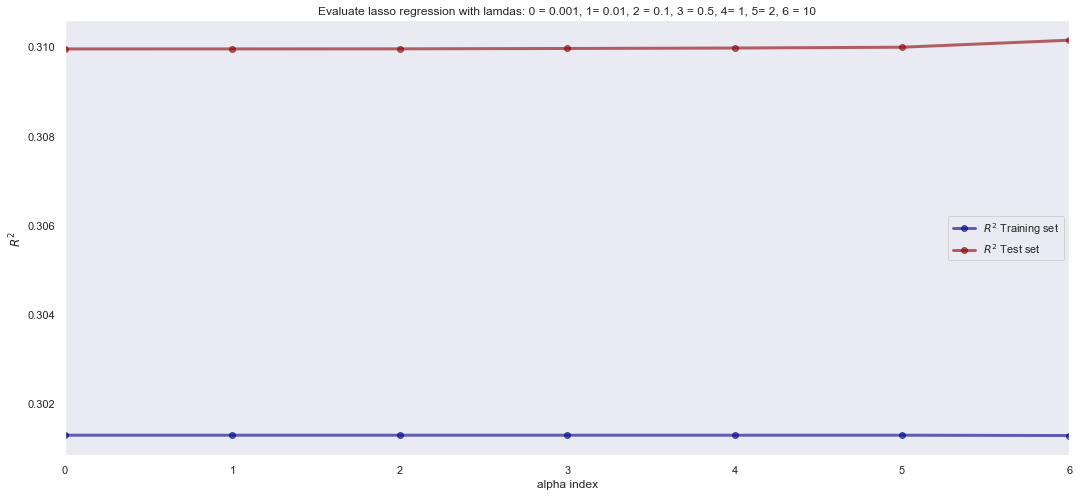

In [60]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('alpha index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

## XGBoosting
Score on training set: 0.581  
Score on test set: 0.355

In [65]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [63]:
params_grid = {'colsample_bytree' : [0.3,0.7,0.8], 'learning_rate' : [0.07,0.1], 'max_depth' : [3,4,5], 
                'n_estimators':[30,40,50], 'subsample':[0.8,1], "objective":"reg:linear" }
xgb = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb,param_grid,cv=3)
grid_search.fit(X_train,y_train)
grid_search.best_params_ # 사용자 지정 중 최적 파라미터
grid_search.best_estimator_ # 전체 중 최적 파라미터

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [35, 40, 45, 50], 'min_samples_leaf': [7, 8, 9, 10], 'min_samples_split': [22, 23, 24, 25], 'max_depth': [3, 4, 5, 6], 'learning_rate': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 22,
 'n_estimators': 50}

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, min_samples_leaf=7, min_samples_split=22,
       missing=nan, monotone_constraints=None, n_estimators=50, n_jobs=0,
       num_parallel_tree=1, objective='reg:squarederror', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)

In [165]:
xgb_final = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1, max_depth = 5, n_estimators = 30, subsample =1, min_samples_leaf=8, min_samples_split=21)
xgb_final.fit(X_train,y_train)
xgb_final_GS = xgb.XGBRegressor(objective ='reg:linear', min_samples_leaf=7, min_samples_split=22, colsample_bytree = 0.9, learning_rate = 0.1, max_depth = 3, n_estimators = 50, subsample = 1)
xgb_final_GS.fit(X_train,y_train)


# preds = xgb_final.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))

print('Score on training set:{:.3f}'.format(xgb_final.score(X_train,y_train)))
print('* Score on test set:{:.3f}'.format(xgb_final.score(X_test,y_test)))
print('Score on training set:{:.3f}'.format(xgb_final_GS.score(X_train,y_train)))
print('* Score on test set:{:.3f}'.format(xgb_final_GS.score(X_test,y_test)))

[07:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, min_samples_leaf=8, min_samples_split=21,
       missing=nan, monotone_constraints=None, n_estimators=30, n_jobs=0,
       num_parallel_tree=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)

[07:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, min_samples_leaf=7, min_samples_split=22,
       missing=nan, monotone_constraints=None, n_estimators=50, n_jobs=0,
       num_parallel_tree=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)

Score on training set:0.586
* Score on test set:0.355
Score on training set:0.474
* Score on test set:0.339


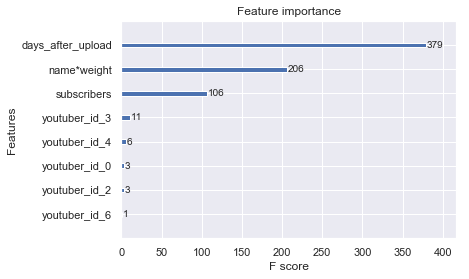

In [69]:
xgb.plot_importance(xgb_final3)
plt.rcParams['figure.figsize'] = [5, 8]
plt.show()

## RandomForest
Score on training set:0.421  
Score on test set:0.358

In [74]:
# export_graphviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf_final=RandomForestRegressor()
# 구하고자 하는 Parameter 와 범위
param_grid={'criterion': ['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],
           'max_depth':[3,4,5],'min_samples_split':[20,21,22,24,25],
           'min_samples_leaf':[8,9,10,11],'n_estimators':[30,40,50]}

# 설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(rf_final,param_grid,scoring='r2',n_jobs=-1)
grid_dt.fit(X_train,y_train)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:{}\n'.format(grid_dt.best_params_))
print('\nbest score:{}\n'.format(grid_dt.best_score_.round(3)))

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5], 'min_samples_split': [20, 21, 22, 24, 25], 'min_samples_leaf': [8, 9, 10, 11], 'n_estimators': [30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

best estimator model:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=22,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

best parameter:{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 22, 'n_estimators': 30}


best score:0.371



In [95]:
rf_final=RandomForestRegressor(n_estimators=30,min_samples_leaf=9,min_samples_split=20,max_depth=4,random_state=1234)
rf_final.fit(X_train,y_train)
rf_final_GS = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=11, min_samples_split=22,
                                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
                                       oob_score=False, random_state=None, verbose=0, warm_start=False)
rf_final_GS.fit(X_train,y_train)

print('Score on training set:{:.3f}'.format(rf_final.score(X_train,y_train)))
print('* Score on test set:{:.3f}'.format(rf_final.score(X_test,y_test)))
print('Score on training set:{:.3f}'.format(rf_final_GS.score(X_train,y_train)))
print('* Score on test set:{:.3f}'.format(rf_final_GS.score(X_test,y_test)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=22,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Score on training set:0.409
* Score on test set:0.345
Score on training set:0.420
* Score on test set:0.358


In [137]:
rf_importance=pd.DataFrame()
rf_importance['Feature']= X_train.columns
rf_importance['Importance']=rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
rf_importance.sort_values('Importance',ascending=False,inplace=True)
rf_importance.round(3)

,Feature,Importance
0,subscribers,0.606
1,days_after_upload,0.172
6,youtuber_id_3,0.120
9,youtuber_id_6,0.036
2,name*weight,0.036
7,youtuber_id_4,0.029
5,youtuber_id_2,0.001
4,youtuber_id_1,0.000
3,youtuber_id_0,0.000
8,youtuber_id_5,0.000
